In [112]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
data = pd.read_csv('project1.csv')

# Part 1
### Identify shape, size of the raw data (1 point)

In [114]:
data.shape

(131165, 12)

In [115]:
data.size

1573980

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131165 non-null  object
 1   Date of Birth     131165 non-null  object
 2   Name              93658 non-null   object
 3   DateTime          131165 non-null  object
 4   MonthYear         131165 non-null  object
 5   Outcome Type      131125 non-null  object
 6   Outcome Subtype   65810 non-null   object
 7   Animal Type       131165 non-null  object
 8   Sex upon Outcome  131165 non-null  object
 9   Age upon Outcome  131165 non-null  object
 10  Breed             131165 non-null  object
 11  Color             131165 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


In [117]:
data

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
...,...,...,...,...,...,...,...,...,...,...,...,...
131160,A671874,1/31/12,NaN,2014-02-04T10:14:00,Feb-14,Transfer,SCRP,Cat,Intact Male,2 years,Domestic Shorthair Mix,Brown Tabby
131161,A672142,2/4/09,Toby,2014-02-08T10:14:00,Feb-14,Transfer,Partner,Dog,Intact Male,5 years,Pekingese,Red/White
131162,A671565,7/6/13,NaN,2014-02-07T10:14:00,Feb-14,Transfer,SCRP,Cat,Spayed Female,7 months,Domestic Medium Hair Mix,Brown Tabby
131163,A675119,2/16/14,NaN,2014-03-27T08:00:00,Mar-14,Transfer,Partner,Dog,Intact Male,1 month,Pomeranian Mix,White/Brown


### Get information about datatypes. Comment if any of the variables need datatype conversion. Check for duplicate rows and treat them. (1 point)

In [118]:
print(type(data))
print(data['Name'].dtype)
print(data['DateTime'].dtype)
print(data['Outcome Type'].dtype)
print(data['Breed'].dtype)
print(data['Color'].dtype)

<class 'pandas.core.frame.DataFrame'>
object
object
object
object
object


In [119]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
131160    False
131161    False
131162    False
131163    False
131164    False
Length: 131165, dtype: bool

In [120]:
print(data.shape)  
print(data.duplicated().sum()) 

(131165, 12)
17


### Identify missing data and/or invalid values and treat them with suitable mean, median, mode or other method (1 point)

In [121]:
data.isnull().sum()

Animal ID               0
Date of Birth           0
Name                37507
DateTime                0
MonthYear               0
Outcome Type           40
Outcome Subtype     65355
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64

In [122]:
data.fillna({'Name':'Unknown'}, inplace=True)     
modeOT = data['Outcome Type'].mode()[0]
data.fillna({'Outcome Type': modeOT}, inplace=True)
data.fillna({'Outcome Subtype':'None'}, inplace=True)

In [123]:
data['Name']

0         Unknown
1         Unknown
2         Unknown
3         Unknown
4         Unknown
           ...   
131160    Unknown
131161       Toby
131162    Unknown
131163    Unknown
131164     Gatsby
Name: Name, Length: 131165, dtype: object

In [124]:
data['Outcome Type']

0         Transfer
1         Transfer
2         Transfer
3         Transfer
4         Transfer
            ...   
131160    Transfer
131161    Transfer
131162    Transfer
131163    Transfer
131164    Transfer
Name: Outcome Type, Length: 131165, dtype: object

In [125]:
data.isnull().sum()

Animal ID           0
Date of Birth       0
Name                0
DateTime            0
MonthYear           0
Outcome Type        0
Outcome Subtype     0
Animal Type         0
Sex upon Outcome    0
Age upon Outcome    0
Breed               0
Color               0
dtype: int64

In [126]:
print("Animal ID:", data['Animal ID'].unique()) 
print("Date of Birth", data['Date of Birth'].unique()) 
print("Name", data['Name'].unique()) 
print("DateTime", data['DateTime'].unique()) 
print("MonthYear", data['MonthYear'].unique()) 
print("Outcome Type", data['Outcome Type'].unique())
print("Outcome Subtype", data['Outcome Subtype'].unique())
print("Animal Type", data['Animal Type'].unique()) 
print("Sex upon Outcome", data['Sex upon Outcome'].unique())
print("Age upon Outcome", data['Age upon Outcome'].unique())
print("Breed", data['Breed'].unique()) 
print("Color:", data['Color'].unique()) 

Animal ID: ['A680855' 'A680857' 'A680858' ... 'A672142' 'A675119' 'A678559']
Date of Birth ['5/25/14' '4/22/14' '6/12/14' ... '3/9/25' '2/28/25' '3/19/25']
Name ['Unknown' 'Jenny Tyson' '*Stetson' ... '*Gorgeous George' '*Hen' 'Nahtha']
DateTime ['2014-06-10T00:00:00-05:00' '2014-07-11T00:00:00-05:00'
 '2014-07-12T00:00:00-05:00' ... '2014-02-08T10:14:00'
 '2014-02-07T10:14:00' '2014-05-14T08:00:00']
MonthYear ['Jun-14' 'Jul-14' 'Aug-14' 'Sep-14' 'Dec-14' 'Jan-15' 'Feb-15' 'Mar-15'
 'Apr-15' 'May-15' 'Jun-15' 'Jul-15' 'Aug-15' 'Sep-15' 'Oct-15' 'Nov-15'
 'Dec-15' 'Jan-16' 'Feb-16' 'Mar-16' 'Apr-16' 'May-16' 'Jun-16' 'Jul-16'
 'Aug-16' 'Sep-16' 'Oct-16' 'Nov-16' 'Dec-16' 'Jan-17' 'Feb-17' 'Mar-17'
 'Apr-17' 'May-17' 'Jun-17' 'Jul-17' 'Aug-17' 'Sep-17' 'Oct-17' 'Nov-17'
 'Dec-17' 'Jan-18' 'Feb-18' 'Mar-18' 'Apr-18' 'May-18' 'Jun-18' 'Jul-18'
 'Aug-18' 'Sep-18' 'Oct-18' 'Nov-18' 'Dec-18' 'Jan-19' 'Feb-19' 'Mar-19'
 'Apr-19' 'May-19' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14' 'Mar-14'
 '

### Visualize the dataset through different univariate analysis and comment on your observations (2)

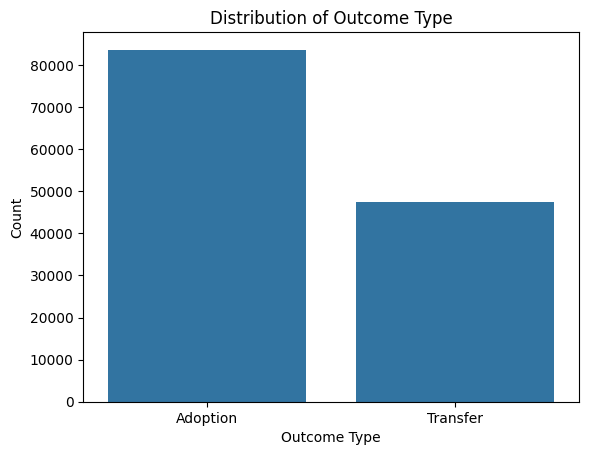

In [127]:
# Outcome Type

plt.figure()
outcome_counts = data['Outcome Type'].value_counts().sort_values(ascending=False)
sns.barplot(x=outcome_counts.index, y=outcome_counts.values) 
plt.title('Distribution of Outcome Type')
plt.ylabel('Count')
plt.show()

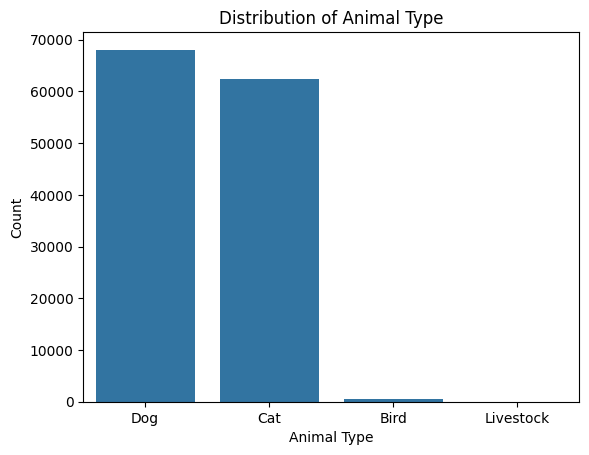

In [128]:
# Animal Type

plt.figure()
outcome_counts = data['Animal Type'].value_counts().sort_values(ascending=False)
sns.barplot(x=outcome_counts.index, y=outcome_counts.values) 
plt.title('Distribution of Animal Type')
plt.ylabel('Count')
plt.show()

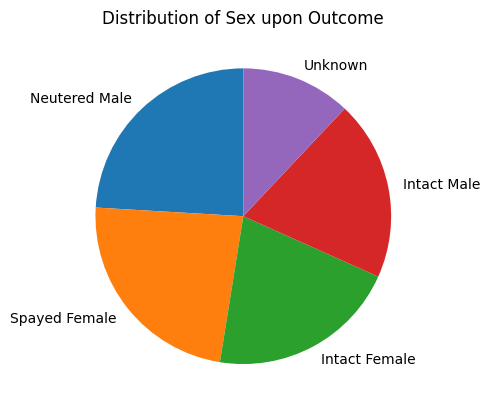

In [155]:
# Sex Upon Outcome

plt.figure()
outcome_counts = data['Sex upon Outcome'].value_counts()
plt.pie(outcome_counts, labels=outcome_counts.index, startangle=90) 
plt.title('Distribution of Sex upon Outcome')
plt.show()

### Drop duplicate rows and irrelevant columns. (1 point)

In [129]:
#data.drop_duplicates(inplace=True, ignore_index=True)

In [130]:
data.duplicated().sum()

17

In [131]:
# Irrelevant columns right now are the animal ID (we already have index), the MonthYear, Date of Birth, and DateTime. 
# We have Age Upon Outcome so all of these columns are pretty redundant. 
# We also don't need Name, Breed, or Color because those are categories that have a lot of different options. 
# So not very relevant for our one-hot encoding. 

columns_d = ['Animal ID', 'DateTime', 'Date of Birth', 'MonthYear', 'Name', 'Breed', 'Color']

data.drop(columns=columns_d, inplace=True)

In [132]:
data.drop_duplicates(inplace=True, ignore_index=True)

In [133]:
data.duplicated().sum()

0

In [134]:
data.head()

,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome
0,Transfer,Partner,Bird,Unknown,2 weeks
1,Adoption,None,Dog,Spayed Female,2 months
2,Transfer,Partner,Bird,Unknown,4 weeks
3,Transfer,Partner,Bird,Intact Male,5 months
4,Transfer,Partner,Bird,Unknown,2 months


### Convert all data to numeric and/or categorical data types. Hint: Make the Age at Outcome column a float by converting all values to one unit for example days. (1 point)

Data Type Conversion
- Will convert age (currently a string) to a float that represents the total days.
- All other columns are already categorical

In [135]:
# ChatGPT helped me write this function 
def age_to_days(age_str):
    age_str = age_str.lower().strip()
    try:
        value, unit = age_str.split(' ', 1)
        value = float(value)
    except ValueError:
        return np.nan

    if 'day' in unit:
        return value
    elif 'week' in unit:
        return value * 7
    elif 'month' in unit:
        return value * 30  
    elif 'year' in unit:
        return value * 365 
    else:
        return np.nan

data['Age in Days'] = data['Age upon Outcome'].apply(age_to_days)
data.drop(columns=['Age upon Outcome'], inplace=True)

In [136]:
data.head()

,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age in Days
0,Transfer,Partner,Bird,Unknown,14.0
1,Adoption,None,Dog,Spayed Female,60.0
2,Transfer,Partner,Bird,Unknown,28.0
3,Transfer,Partner,Bird,Intact Male,150.0
4,Transfer,Partner,Bird,Unknown,60.0


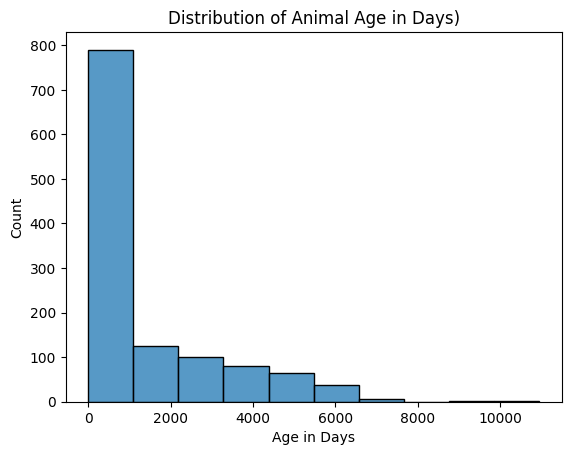

In [137]:
plt.figure()
sns.histplot(x=data['Age in Days'],  bins=10)

plt.title('Distribution of Animal Age in Days)')
plt.show()

### Perform one-hot encoding on categorical variables (1 point)

In [138]:
cols_r = ['Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome']
data_ohe = pd.get_dummies(data, columns=cols_r, drop_first=True)

print(f"Shape after One Hot Encoding: {data_ohe.shape}")
data_ohe.head()

Shape after One Hot Encoding: (1205, 18)


,Age in Days,Outcome Type_Transfer,Outcome Subtype_Emer,Outcome Subtype_Foster,Outcome Subtype_In State,Outcome Subtype_None,Outcome Subtype_Offsite,Outcome Subtype_Out State,Outcome Subtype_Partner,Outcome Subtype_SCRP,Outcome Subtype_Snr,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown
0,14.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1,60.0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
2,28.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
3,150.0,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
4,60.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True


In [139]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age in Days                     1205 non-null   float64
 1   Outcome Type_Transfer           1205 non-null   bool   
 2   Outcome Subtype_Emer            1205 non-null   bool   
 3   Outcome Subtype_Foster          1205 non-null   bool   
 4   Outcome Subtype_In State        1205 non-null   bool   
 5   Outcome Subtype_None            1205 non-null   bool   
 6   Outcome Subtype_Offsite         1205 non-null   bool   
 7   Outcome Subtype_Out State       1205 non-null   bool   
 8   Outcome Subtype_Partner         1205 non-null   bool   
 9   Outcome Subtype_SCRP            1205 non-null   bool   
 10  Outcome Subtype_Snr             1205 non-null   bool   
 11  Animal Type_Cat                 1205 non-null   bool   
 12  Animal Type_Dog                 12

# Part 2

In [157]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

### First, drop the Breed column, as it will complicate the analysis here in Part 3.

Breed was dropped earlier!

In [141]:
data_ohe.head()

,Age in Days,Outcome Type_Transfer,Outcome Subtype_Emer,Outcome Subtype_Foster,Outcome Subtype_In State,Outcome Subtype_None,Outcome Subtype_Offsite,Outcome Subtype_Out State,Outcome Subtype_Partner,Outcome Subtype_SCRP,Outcome Subtype_Snr,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown
0,14.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1,60.0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
2,28.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
3,150.0,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
4,60.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True


### Split the data into training and test datasets. Make sure your split is reproducible and that it maintains roughly the proportion of each class of dependent variable. (1 point)


In [142]:
X = data_ohe.drop(columns=['Outcome Type_Transfer']) 
y = data_ohe['Outcome Type_Transfer']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of Training Data: {X_train.shape[0]} samples")
print(f"Shape of Testing Data: {X_test.shape[0]} samples")

Shape of Training Data: 843 samples
Shape of Testing Data: 362 samples


### Perform classification to predict using OutcomeType (4 points)
K-Nearest Neighbor Classifier (1 point)

K-Nearest Neighbor Classifier using Grid search CV (2 points)

Linear classification (1 point)

In [143]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_report = classification_report(y_test, y_pred)
knn_accuracy_score = accuracy_score(y_test, y_pred)

print(f"KNN Accuracy: {knn_accuracy_score:.3f}")

KNN Accuracy: 0.854


In [144]:
param_grid = {"n_neighbors": np.arange(1, 100)}

knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
knn_gscv.fit(X_train, y_train)

best_k = knn_gscv.best_params_['n_neighbors']
print(f"Best K value: {best_k}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

y_pred_best_knn = best_knn.predict(X_test)
knn_gscv_report = classification_report(y_test, y_pred_best_knn)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)

print(f"Best KNN Accuracy: {accuracy_best_knn:.2f}")

Best K value: 1
Best KNN Accuracy: 0.88


In [145]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
log_report = classification_report(y_test, y_pred_log)
log_accuracy = accuracy_score(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")

Logistic Regression Accuracy: 0.99


### Print report showing accuracy, recall, precision and f1-score for each classification model. Which metric is most important for this problem? (You will explain your answer in the report in Part 3). ( 2 points)

In [86]:
print("KNN Classification Report:")
print(knn_report)

print("Best KNN Classification Report (Grid Search CV):")
print(knn_GSCV_report)

print("Logistic Regression Classification Report:")
print(log_report)

KNN Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.76      0.82       161
        True       0.83      0.93      0.88       201

    accuracy                           0.85       362
   macro avg       0.86      0.84      0.85       362
weighted avg       0.86      0.85      0.85       362

Best KNN Classification Report (Grid Search CV):
              precision    recall  f1-score   support

       False       0.88      0.84      0.86       161
        True       0.88      0.91      0.89       201

    accuracy                           0.88       362
   macro avg       0.88      0.87      0.88       362
weighted avg       0.88      0.88      0.88       362

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       161
        True       0.99      1.00      1.00       201

    accuracy                           0.99       362
   macro 

Text(0.5, 23.52222222222222, 'Predicted Outcome Type')

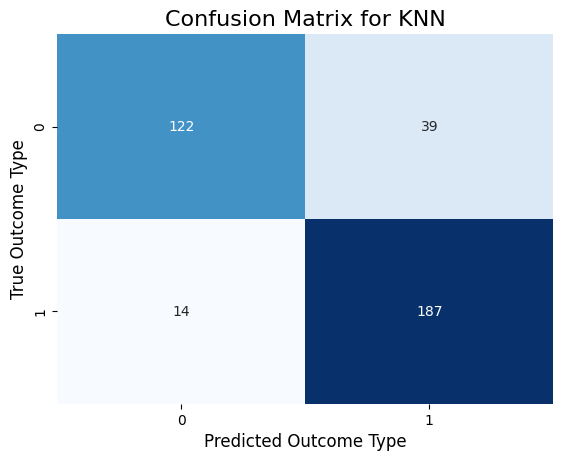

In [166]:
# See [1]. ChatGPT helped me fix the syntax for this code. 
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix for KNN', fontsize=16)
plt.ylabel('True Outcome Type', fontsize=12)
plt.xlabel('Predicted Outcome Type', fontsize=12)

Text(0.5, 23.52222222222222, 'Predicted Outcome Type')

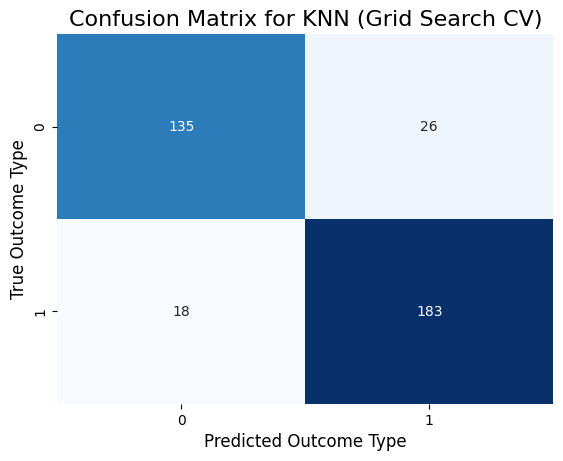

In [167]:
cm = confusion_matrix(y_test, y_pred_best_knn)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix for KNN (Grid Search CV)', fontsize=16)
plt.ylabel('True Outcome Type', fontsize=12)
plt.xlabel('Predicted Outcome Type', fontsize=12)

Text(0.5, 23.52222222222222, 'Predicted Outcome Type')

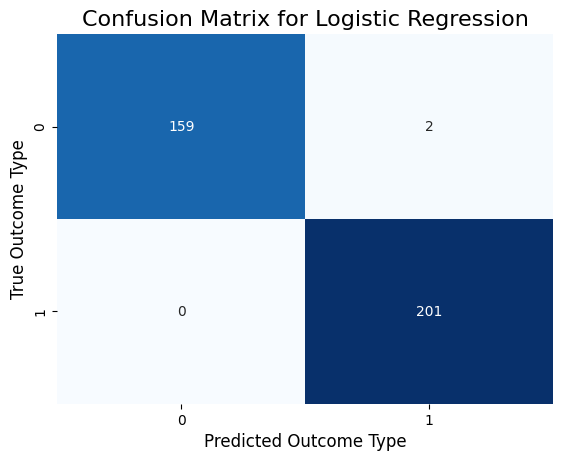

In [168]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.ylabel('True Outcome Type', fontsize=12)
plt.xlabel('Predicted Outcome Type', fontsize=12)

The most important metric for this problem is accuracy. Accuracy will allow us to determine the predictive performance overall and the model's ability to distinguish true positives and true negative correctly.